Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
         MedInc  MedianHouseValue  AveRooms  AveBedrms  HouseAge
0      2.344766          2.129631  0.628559  -0.153758  0.982143
1      2.332238          1.314156  0.327041  -0.263336 -0.607019
2      1.782699          1.258693  1.155620  -0.049016  1.856182
3      0.932968          1.165100  0.156966  -0.0

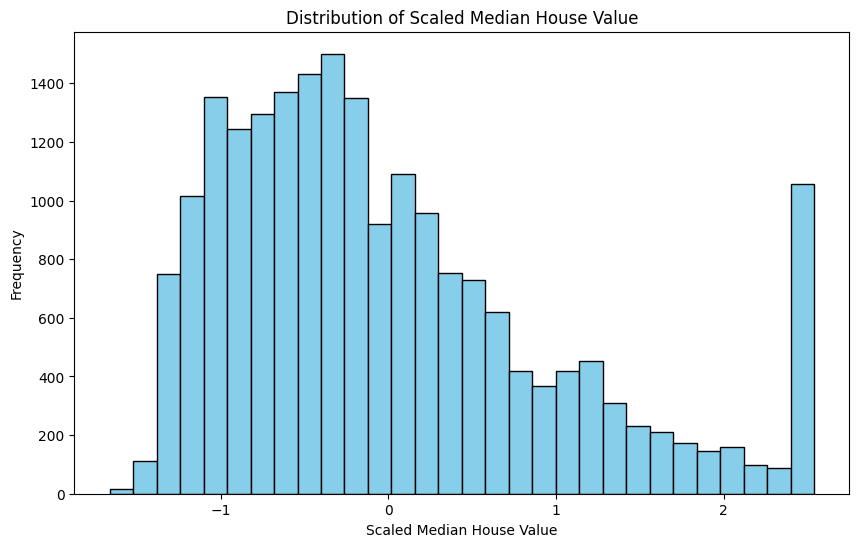

Bin with largest frequency: 10
Scaled interval: (-0.4017253131223284, -0.2616235868908776)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler


california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedianHouseValue'] = california_housing.target


print("Dataset Information:")
print(df.info())

df.dropna(inplace=True)


median_income_median = df['MedInc'].median()
median_income_mean = df['MedInc'].mean()
median_income_std = df['MedInc'].std()

median_house_value_median = df['MedianHouseValue'].median()
median_house_value_mean = df['MedianHouseValue'].mean()
median_house_value_std = df['MedianHouseValue'].std()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['MedInc', 'MedianHouseValue', 'AveRooms', 'AveBedrms','HouseAge']])


df_scaled = pd.DataFrame(scaled_features, columns=['MedInc', 'MedianHouseValue', 'AveRooms', 'AveBedrms','HouseAge'])
print(df_scaled)

plt.figure(figsize=(10, 6))
plt.hist(df_scaled['MedianHouseValue'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Scaled Median House Value')
plt.xlabel('Scaled Median House Value')
plt.ylabel('Frequency')
plt.show()

bin_counts, bin_edges = np.histogram(df_scaled['MedianHouseValue'], bins=30)
max_freq_index = np.argmax(bin_counts)
max_freq_interval = (bin_edges[max_freq_index], bin_edges[max_freq_index + 1])


print("Bin with largest frequency:", max_freq_index + 1)
print("Scaled interval:", max_freq_interval)





Standardized data analysis with scaled median house values.
Interval (-0.4017, -0.2616) has the highest frequency in the histogram.
Both values are negative, indicating below-average prices.
Moderate negativity implies the most common range of median house values lies within a moderately below-average price range .
Significant portion of houses fall within this concentrated price segment.

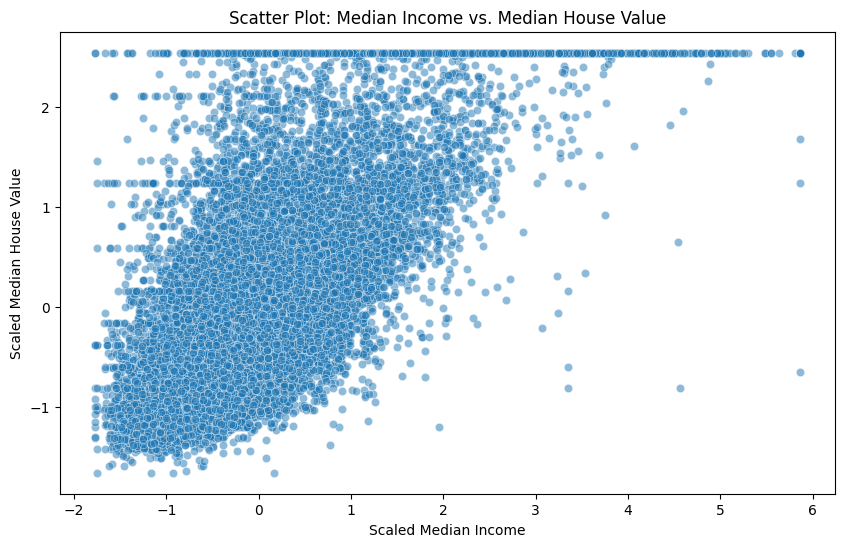

In [9]:
# 2. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedianHouseValue', data=df_scaled, alpha=0.5)
plt.title('Scatter Plot: Median Income vs. Median House Value')
plt.xlabel('Scaled Median Income')
plt.ylabel('Scaled Median House Value')
plt.show()


As we can see The scatter plot vividly depicts a positive linear relationship between scaled median income and scaled median house price in the California housing dataset. This positive correlation suggests that higher-income areas generally exhibit higher house prices, reflecting a close connection between income levels and housing costs in California.


In [10]:
import plotly.express as px


# Assuming 'Latitude' and 'Longitude' columns exist in your DataFrame
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='MedianHouseValue',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Geographical Distribution of Median House Values')
fig.show()


A Mapbox exploration of California housing paints a vivid picture:

Coastal Hotspots: Red icons blaze along the coast, revealing high-priced havens drawn to desirable amenities.   

Inland Cool Spots: Blue markers dot inland areas, signifying regions with more affordable housing options.

Regional Nuances: Zooming in uncovers potential price disparities between north/south and coastal/inland regions.

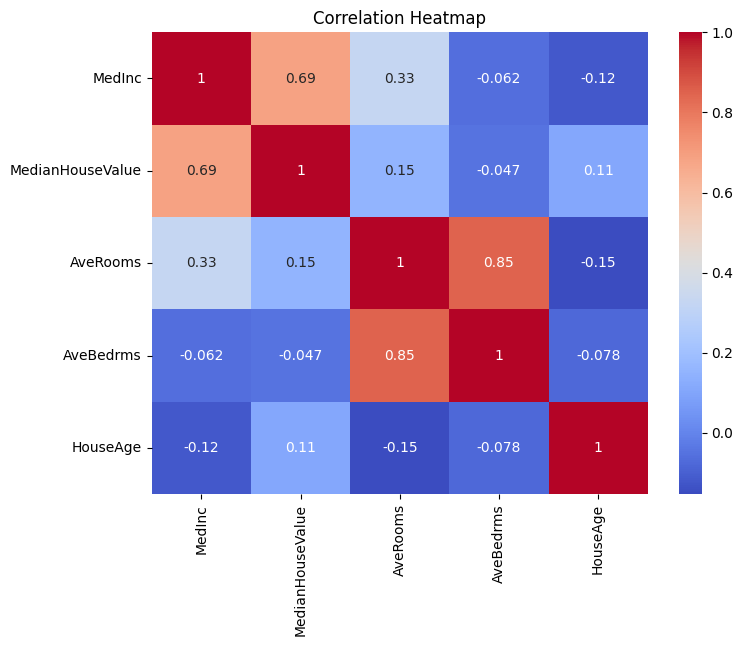

In [11]:
# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df_scaled[['MedInc', 'MedianHouseValue', 'AveRooms', 'AveBedrms','HouseAge']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



From the heatmap we can see that

Strong correlations (red and orange squares)

median household income and median house price are strongly related implying higher the income of individual stay in costlier areas of residence

there is a strong relation between average rooms and average bedrooms implying greater the number of rooms greater is the percentage of those rooms being bed rooms

weak correlation(deep blue squares)

the correlation between average number of rooms and median house value is astonishing as it shows that the increase in number of rooms does not increase the house value this might be due to a variety of factors like old houses and inland areas etc.

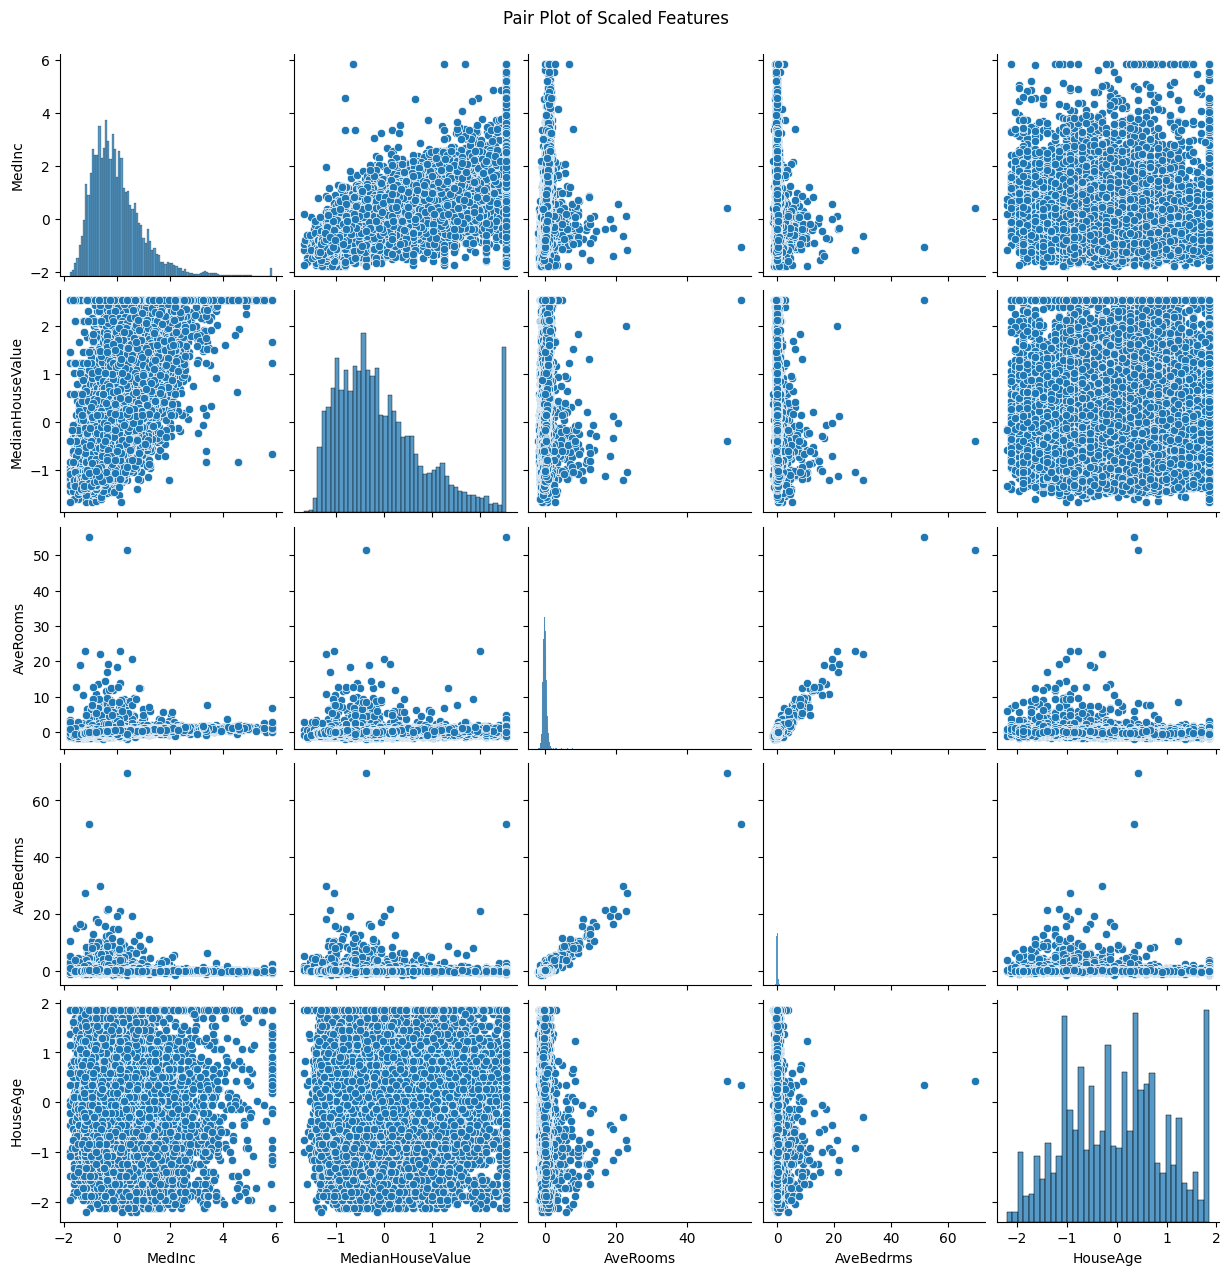

In [12]:
sns.pairplot(df_scaled[['MedInc', 'MedianHouseValue', 'AveRooms', 'AveBedrms','HouseAge']])
plt.suptitle('Pair Plot of Scaled Features', y=1.02)
plt.show()

From the above pairplot we can see that

1)median income and median house value are positively correlated

2)average bedrooms and average rooms have a positively correlated

3)average rooms and median income has a weak positive correlation

4)average rooms and average bedrooms have no impact on the median house value

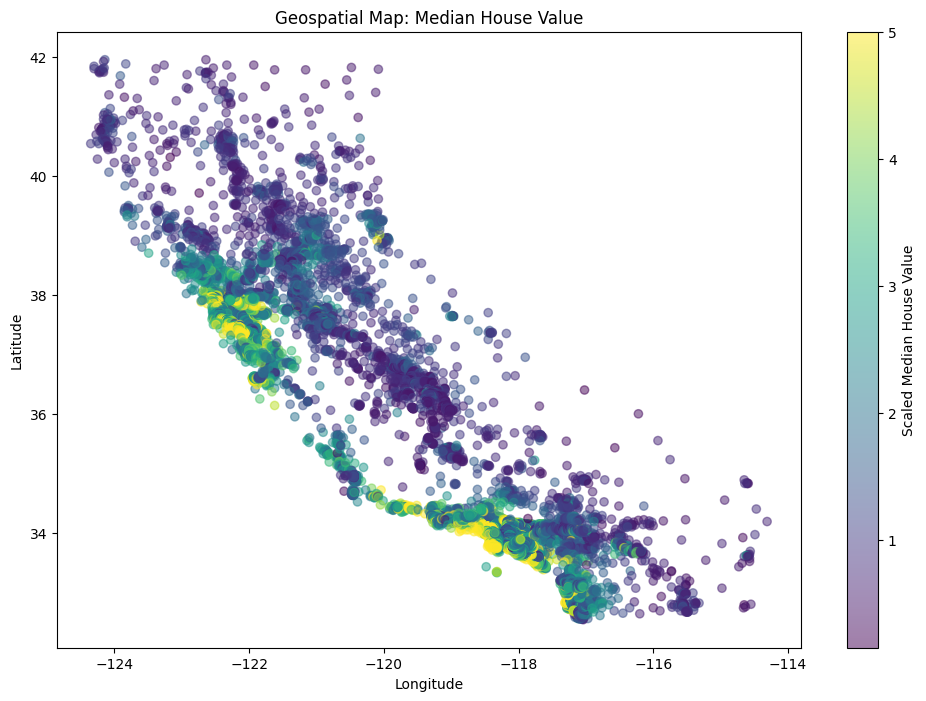

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedianHouseValue'], cmap='viridis', alpha=0.5)
plt.title('Geospatial Map: Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Scaled Median House Value')
plt.show()

this is another way to show median house distribution using latitudes and longitudes but unlike mapbox we dont get a map but we get the rough distribution points

here green points means areas with very high median value which as we can see are concentrated close to the coastline of california while the less costly reddish points are concentrated mostly inland

as we can see the relation between house age and medianhousevalue is not that distinct i.e they both have a weak correlation with respect to each other but what we can infer is that the younger the house higher is the value of that house

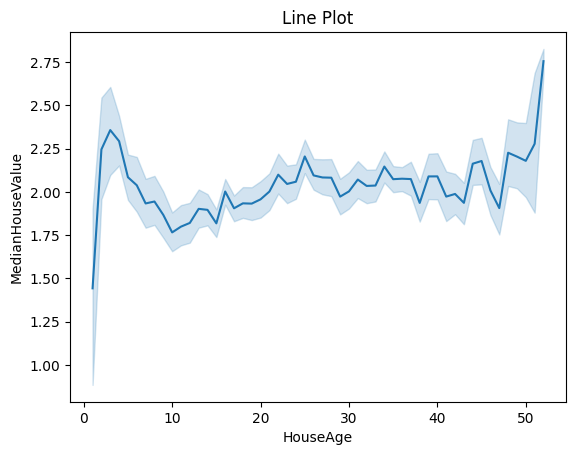

In [14]:
sns.lineplot(x='HouseAge', y='MedianHouseValue', data=df)
plt.title('Line Plot')
plt.show()


as we can see that there is a weak correlation between houseage and medianhousevalue but however we can partially inference that the medianhouseprice is higher for young houses age less than 10years and also higher for houses older than 50 years